# Trying out Ruby for Data Science \o/


### Requirements

- Python3
  - `$ pip install matplotlib`
- Ruby
 - `$ gem install matplotlib`


### Setup

In [11]:
require "csv"
require "matplotlib/iruby"
require "matplotlib/pyplot"
Matplotlib::IRuby.activate

[:inline, "module://ruby.matplotlib.backend_inline"]

### Parsing the CSV

In [6]:
crashes = CSV.read("airplane-crashes.csv", headers: true)

#<CSV::Table mode:col_or_row row_count:5269>

#### Question 1: How many crashes per year?

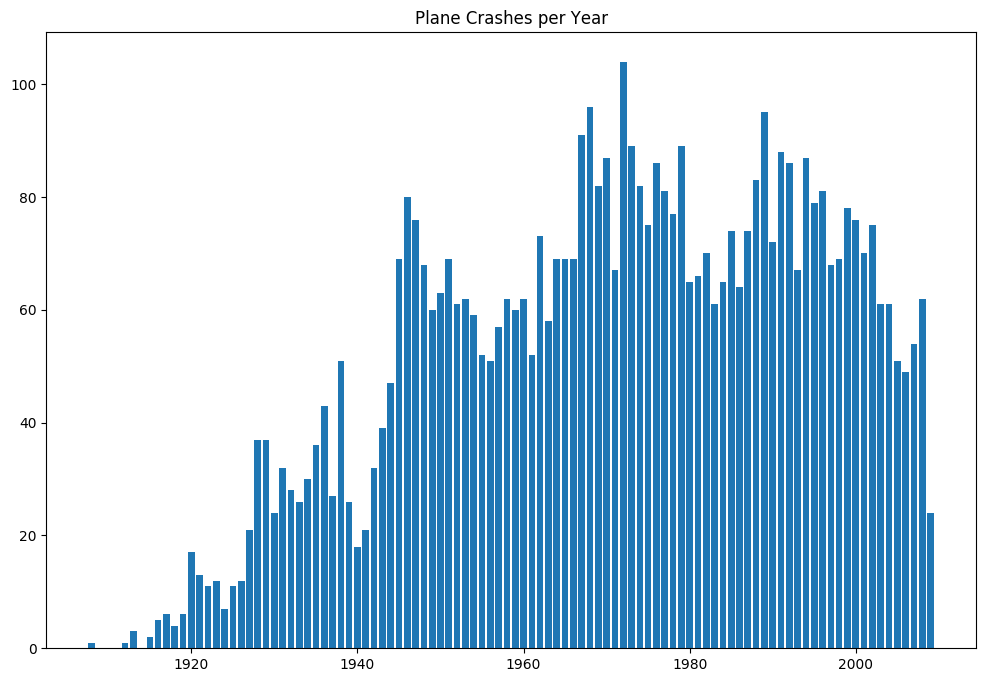

In [9]:
years = {}
years.default = 0

crashes.each{ |line|
  if %r[/(\d{4})\z] =~ line[0]
    year = $1.to_i
    years[year] += 1
  end
}

xs, ys = years.to_a.sort.transpose

# - - -

plt = Matplotlib::Pyplot
plt.rcParams['figure.figsize'] = [12.0, 8.0]
plt.bar(xs, ys)
plt.title "Plane Crashes per Year"
plt.show()